In [1]:
import pandas as pd
import altair as alt
import glob, os
import warnings
warnings.filterwarnings('ignore')

alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

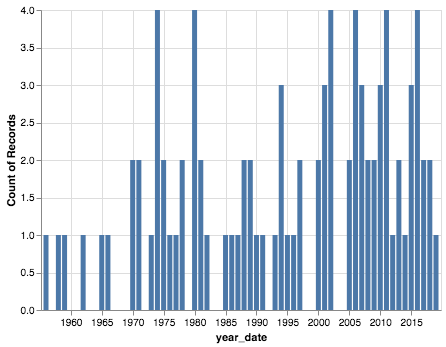

In [2]:
naguib_df = pd.read_csv('naguib_egypts_destiny_citations_redux.csv')
naguib_df = naguib_df.loc[naguib_df.year.isna() != True]
naguib_df['year_date'] = pd.to_datetime(naguib_df['year'], format='%Y', errors='coerce')
alt.Chart(naguib_df).mark_bar().encode(
    x='year_date:T',
    y='count()'
)

In [3]:
nasser_df = pd.read_csv('potr_citations_redux.csv')

In [4]:
nasser_df.book_searched[nasser_df.url == 'https://scholar.google.com/scholar?cites=18384710366382244445&as_sdt=20000005&sciodt=0,21&hl=en&scioq=Falsafat+Al-Thawrah'] = "The Philosophy of the Revolution Book I dar al ma'arif"

In [36]:
nasser_df.book_searched.unique()

nasser_df.book_searched[nasser_df.book_searched == "The Philosophy of the Revolution Book I dar al ma'arif"] = "The Philosophy of the Revolution Book I (Arabic Version) Published by Dar al Ma'arif 1953"
nasser_df.book_searched[nasser_df.book_searched == "Falsafat Al-Thawrah 1966"] = "Falsafat Al-Thawrah Published by Egyptian Information Department 1966"
nasser_df.book_searched[nasser_df.book_searched == "Egypt's Liberation the Philosophy of the Revolution"] = "Egypt's Liberation: The Philosophy of the Revolution Published by Public Affairs Press 1955"

nasser_df.book_searched[nasser_df.book_searched == "The Philosophy of the Revolution"] = "The Philosophy of the Revolution Published by Smith, Keynes & Marshall 1959"

In [66]:
nasser_df = nasser_df.loc[nasser_df.year.isna() != True]
nasser_df['year_date'] = pd.to_datetime(nasser_df['year'], format='%Y', errors='coerce')

nd = nasser_df.groupby(['book_searched','year_date']).count().reset_index()
nd = nd[['year_date', 'book_searched', 'year']]
test = nd.pivot(index='year_date', columns='book_searched', values='year')
test.fillna(0 , inplace=True)
test = test.unstack().reset_index() 
test.rename(columns={0: 'value'}, inplace=True)
# nd.reindex(idx, fill_value=0)
nasser = alt.Chart(test).mark_line(size=3.5).encode(
    x=alt.X('year_date:T',axis=alt.Axis(title='')),
    y=alt.Y('value:Q',axis=alt.Axis(title='')),
    color=alt.Color('book_searched:N', sort=["The Philosophy of the Revolution Book I (Arabic Version) Published by Dar al Ma'arif 1953", "Egypt's Liberation: The Philosophy of the Revolution Published by Public Affairs Press 1955", "The Philosophy of the Revolution Published by Smith, Keynes & Marshall 1959", "Falsafat Al-Thawrah Published by Egyptian Information Department 1966"], scale=alt.Scale(scheme='inferno'), legend=alt.Legend(title="Book")),
    
).properties(
    title='Google Scholar Book Citations Per Year',
    width=500
).configure_legend(labelLimit= 0)
nasser
nasser.save('potr_books_citations_all.png', scale_factor=2.0)

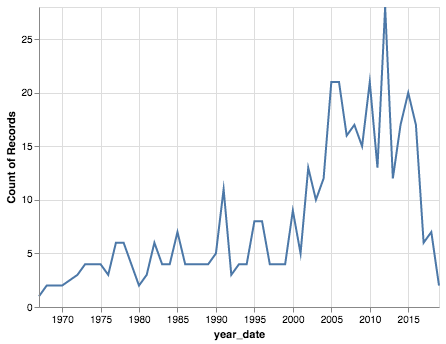

In [7]:
nkrumah_df = pd.read_csv('neocolonialism_citations_redux.csv')
nkrumah_df = nkrumah_df.loc[nkrumah_df.year.isna() != True]
nkrumah_df['year_date'] = pd.to_datetime(nkrumah_df['year'], format='%Y', errors='coerce')
alt.Chart(nkrumah_df).mark_line().encode(
    x='year_date:T',
    y='count()'
)

In [8]:
nasser_df['Book'] = 'The Philosophy of the Revolution by Gamal Abdel Nasser'
naguib_df['Book'] = "Egypt's Destiny: A Personal Statement by Mohammed Naguib"
nkrumah_df['Book'] = 'Neo-Colonialism: The Last Stage of Imperialism by Kwame Nkrumah'
        

In [151]:
len(nasser_df.loc[nasser_df.year_date < '2016-01-01']), len(nasser_df)

(398, 455)

In [158]:
nd = nasser_df.loc[nasser_df.year_date < '2016-07-01']
nk = nkrumah_df.loc[nkrumah_df.year_date < '2016-07-01']
ng = naguib_df.loc[naguib_df.year_date < '2016-07-01']

In [164]:
books = pd.concat([nd])
order = ['The Philosophy of the Revolution by Gamal Abdel Nasser', 'Neo-Colonialism: The Last Stage of Imperialism by Kwame Nkrumah', "Egypt's Destiny: A Personal Statement by Mohammed Naguib"]
boo = books.groupby(['Book','year_date']).count().reset_index()
boo
bood = boo[['year_date', 'Book', 'year']]
test = bood.pivot(index='year_date', columns='Book', values='year')
test.fillna(0 , inplace=True)
test = test.unstack().reset_index() 
test.rename(columns={0: 'value'}, inplace=True)
alt.themes.enable('opaque')
bk1 = alt.Chart(test).mark_line(size=3.5).encode(
    x=alt.X('year_date:T', axis=alt.Axis(title='')),
    y=alt.Y('value:Q',axis=alt.Axis(title='')),
    color=alt.Color('Book:O',scale=alt.Scale(scheme='inferno'),legend=alt.Legend(orient="right"), sort=order)
).properties(
    title='',
    width=400
)

books = pd.concat([nd, nk, ng])

boo = books.groupby(['Book','year_date']).count().reset_index()
boo
bood = boo[['year_date', 'Book', 'year']]
test = bood.pivot(index='year_date', columns='Book', values='year')
test.fillna(0 , inplace=True)
test = test.unstack().reset_index() 
test.rename(columns={0: 'value'}, inplace=True)
bk2 = alt.Chart(test).mark_line(size=3.5).encode(
    x=alt.X('year_date:T', axis=alt.Axis(title='')),
    y=alt.Y('value:Q',axis=alt.Axis(title='')),
    color=alt.Color('Book:O',scale=alt.Scale(scheme='inferno'),legend=alt.Legend(orient="right"), sort=order)
).properties(
    title='',
    width=400
)

charts = alt.hconcat(bk1 | bk2, title="Figure 2. Google Scholar Citations Frequency Per Year" ).configure_legend(labelLimit= 0)
charts
charts.save('potr_books_citations_fig1.png', scale_factor=2.0)

In [150]:
nasser_df.year_date.unique()

array(['2014-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '1988-01-01T00:00:00.000000000', '1969-01-01T00:00:00.000000000',
       '2003-01-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '1968-01-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1975-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '1973-01-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '1970-01-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2005-01-01T00:00:00.000000000', '1981-01-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '1996-01-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '1962-01-01T00:00:00.000000000',
       '1993-01-01T00:00:00.000000000', '1990-01-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '1986-01-01

In [71]:
df = pd.read_csv('nasser_citations_worldcat.csv')

In [87]:
def get_year(rows):
    items = rows.replace('.', '').replace('?','').replace('-', ' ').split(' ')
    year = 0
    for item in items:
        try:
            int(item)
#             df['year'] = int(item)
            year = int(item)
            break
        except ValueError:
            pass
    return year

df['year'] = df.publisher.apply(get_year)

In [90]:
empties = df.loc[df.year == 0]
len(empties), len(df)

(57, 627)

In [91]:
empties

,author_searched,url,title,author_listed,publisher,year
52,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,\nNasser speaks.\n,by Gamal Abdel Nasser,"Publisher: London : Morssett Press, ©1972",0
54,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,\nPresident Gamal Abdel-Nasser's speeches and ...,by United Arab Republic. Maṣlaḥat al-Istiʻla...,"Publisher: Cairo, U.A.R. : Information Dept.",0
69,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,\nThe philosophy of the revolution : a letter ...,by Gamal Abdel Nasser; Richard H Nolte,Publisher: New York : American Universities Fi...,0
112,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,\n[Gamal Abdel Nasser talks about the Suez Can...,by Gamal Abdel Nasser,No publisher,0
125,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,\nAddress by President Gamal Abdel Nasser at a...,by Gamal Abdel Nasser,"Publisher: Cairo, Information Dept. date of pu...",0
147,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,\nPresident Gamal Abdel Nasser's Address to Me...,by Gamal Abdel Nasser,"Publisher: Cairo : State Information Service, ...",0
172,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,\nThe philosophy of the revolution : a letter ...,by Gamal Abdel Nasser; Richard H Nolte,No publisher,0
181,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,\nLa vision nassérienne\n,by Gamal Abdel Nasser; Paul Balta; Claudine Ru...,"Publisher: Paris : Sindbad, ©1982.",0
188,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,\nThe Israeli war : of aggression and expansio...,"by Gamal Abdel Nasser, Pres. República Arabe ...",Publisher: Amsterdam : Drukkerij Holland-Breum...,0
194,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,"\nSpeeches, 1959-1968.\n",by Gamal Abdel Nasser; United Arab Republic. P...,No publisher,0


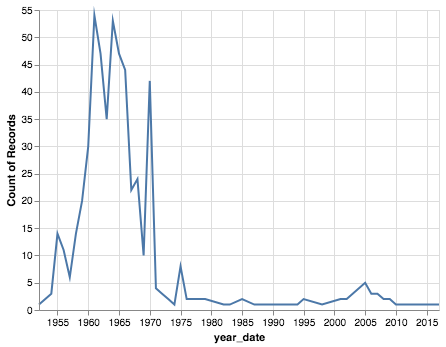

In [97]:
all_df = df.loc[df.year != 0]
all_df = all_df.loc[all_df.year != 1900]
all_df['year_date'] = pd.to_datetime(all_df['year'], format='%Y', errors='coerce')
alt.Chart(all_df).mark_line().encode(
    x='year_date:T',
    y='count()'
)

In [96]:
all_df.sort_values(by=['year_date'])

,author_searched,url,title,author_listed,publisher,year,year_date
95,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,\nL'Exposition des mosaïques de Ravenne du V ...,by Gamal Abdel Nasser;,"Publisher: Caire : Niversitaires d'Egypteb, 1900?",1900,1900-01-01
523,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,\nDie Philosophe der Revolution\n,by Gamal Abdel Nasser,"Publisher: Cairo : Mondiale Press, 1952",1952,1952-01-01
403,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,\nLa filosofia della rivoluzione\n,by Gamal Abdel Nasser,"Publisher: Cairo : Dar Al-Maaref, 1954?",1954,1954-01-01
531,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,\nFalsafat al-thawrah\n,by Gamal Abdel Nasser,"Publisher: Miṣr : Dār al-Maʻārif, 1954.",1954,1954-01-01
278,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,\nMisir Thtilål Içyüzü\n,by Gamal Abdel Nasser,Publisher: Istanbul Vatan Gazetecilik ve Matba...,1954,1954-01-01
162,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,\nGoals of the Egyptian revolution.\n,by Gamal Abdel Nasser;,Publisher: Cairo s.n. 1955,1955,1955-01-01
433,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,\nLes grandes decouvertes archeologiques de 19...,by Gamal Abdel Nasser;,"Publisher: Cairo : Revue du Caire, 1955.",1955,1955-01-01
360,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,\nLa philosophie de la révolution\n,by Gamal Abdel Nasser,"Publisher: Le Caire : Dar al-Maaref, zwischen ...",1955,1955-01-01
354,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,"\nal-Dīmuqrātīyah, min aqwāl al-Raʼīs Jam...",by Gamal Abdel Nasser,Publisher: al-Qāhirah al-Dār al-Qawmīyah li...,1955,1955-01-01
415,Gamal Abdel Nasser,https://www.worldcat.org/search?q=au%3Agamal+a...,\nخطابان للرئيس جمال عبد الناصر عن حق مصر في ا...,by Gamal Abdel Nasser;,Publisher: Place of publication not identified...,1955,1955-01-01


In [98]:
df1 = pd.read_csv('nasser_citations_googlescholar.csv')

In [103]:
df1.year[df1.cited == 271] = 1959

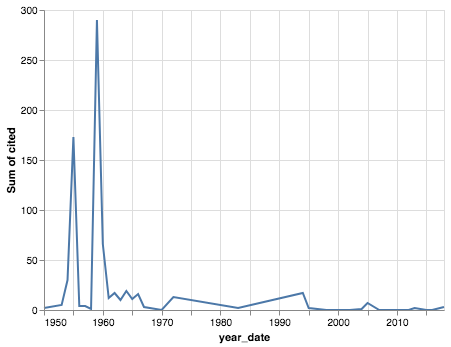

In [104]:
df1 = df1.loc[df1.year.isna() == False]
df1['year_date'] = pd.to_datetime(df1['year'], format='%Y', errors='coerce')
alt.Chart(df1).mark_line().encode(
    x='year_date:T',
    y='sum(cited):Q'
)

In [125]:
df2 = all_df.groupby(['year_date']).count().reset_index()

In [126]:
df2 =df2[['year_date', 'year']]
df2.rename(columns={'year': 'cited'}, inplace=True)
df2['type'] = 'Publication Frequency According to Worldcat'

In [127]:
df1['type'] = 'Citation Frequency to Google Scholar'
books = pd.concat([df1[['year_date', 'cited', 'type']], df2])
books
boo = books.groupby(['type','year_date'])['cited'].sum().reset_index()
boo
# bood = boo[['year_date', 'Book', 'year']]
test = boo.pivot(index='year_date', columns='type', values='cited')
test.fillna(0 , inplace=True)
test = test.unstack().reset_index() 
test
test.rename(columns={0: 'value'}, inplace=True)

In [132]:
alt.themes.enable('opaque')
bk = alt.Chart(test).mark_line(size=3.5).encode(
    x=alt.X('year_date:T', axis=alt.Axis(title='')),
    y=alt.Y('value:Q',axis=alt.Axis(title='')),
    color=alt.Color('type:O',scale=alt.Scale(scheme='inferno'),legend=alt.Legend(orient="right",title=""))
).properties(
    title="Gamal Abdel Nasser's Publications and Citations Per Year",
    width=400
).configure_legend(labelLimit= 0)
bk
bk.save('nasser_books_citations_pubs.png', scale_factor=2.0)

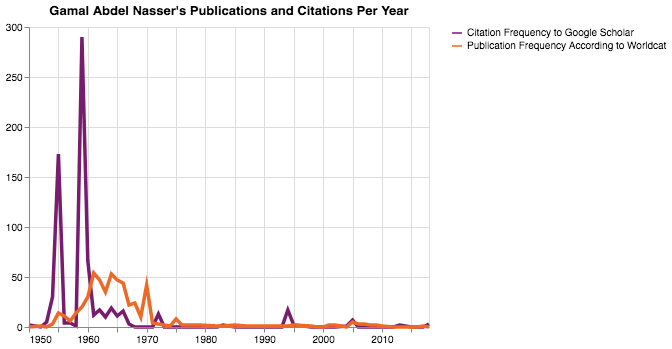

In [131]:
bk